# Mapping homicides, by state

#### Load python tools

In [1]:
%load_ext lab_black

In [2]:
import pandas as pd
import geopandas as gpd
import numpy as np

In [3]:
pd.options.display.max_columns = 1000
pd.options.display.max_rows = 1000

### Crime map
##### What's the murder rate by state?

In [25]:
# Values: https://raw.githubusercontent.com/stiles/usc/main/data/processed/homicide-rates-states.csv
# Geo: https://raw.githubusercontent.com/stiles/usc/main/data/geo/states.geojson

#### Read state-level homicide data

In [26]:
homicide_df = pd.read_csv(
    "https://raw.githubusercontent.com/stiles/usc/main/data/processed/homicide-rates-states.csv"
)

In [27]:
homicide_df.head()

,year,state,rate,deaths,url,name,usps,ap
0,2020,AL,14.2,654,/nchs/pressroom/states/alabama/al.htm,Alabama,AL,Ala.
1,2020,AK,7.3,55,/nchs/pressroom/states/alaska/ak.htm,Alaska,AK,Alaska
2,2020,AZ,7.5,525,/nchs/pressroom/states/arizona/az.htm,Arizona,AZ,Ariz.
3,2020,AR,13.0,371,/nchs/pressroom/states/arkansas/ar.htm,Arkansas,AR,Ark.
4,2020,CA,6.1,2368,/nchs/pressroom/states/california/ca.htm,California,CA,Calif.


#### Read state-level geo file

In [28]:
states_gdf = gpd.read_file(
    "https://raw.githubusercontent.com/stiles/usc/main/data/geo/states.geojson"
)

#### Filter: Just map the mainland

In [29]:
exclude = ["Hawaii", "Alaska"]

In [30]:
states_gdf_mainland = states_gdf[~states_gdf["state_name"].isin(exclude)]

#### Merge the two

In [31]:
states_homicide_gdf = pd.merge(
    states_gdf_mainland, homicide_df, left_on="state_name", right_on="name"
)

<AxesSubplot:>

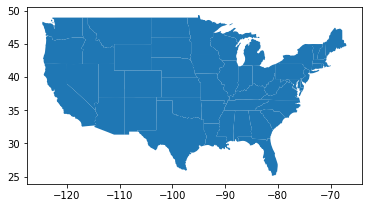

In [32]:
states_homicide_gdf.plot()

#### Export merged geo file

In [33]:
states_homicide_gdf.to_file("../data/geo/states_homicide.geojson", driver="GeoJSON")